<a href="https://colab.research.google.com/github/Shamika2021/PortfolioProjects/blob/main/OGTIP_Project_3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement** : We are Given the limited student data from a reputed university that include relevant information of the students currently enrolled in  the university for a specific program like personal information and curriculum data.

Our task is to perform detail EDA on the data and prepare a prediction model which predicts whether a college student will graduate or not using at least five machine learning algorithms.

To bring relevant inference from the model by visualizing the performance through confusion metrics and AUC-ROC curve.

**Importing Required Libraries**

As the first step we are going to import all the required libraries.

In [ ]:
!pip install dataprep # Install the dataprep library using pip
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
#metrics calculation
from sklearn import metrics

from dataprep.eda import plot


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from dataprep.eda import plot_correlation

**Import the data set**

The next step is to import the data set in to the environment.

In [ ]:
#import the dataset
df = pd.read_csv("/content/Student_academic.csv")
#display the first five raws of the data set
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

**Understanding the Data Set**

Next let's understand the data set.

In [ ]:
#dimentions of the dataframe
df.shape

(4424, 35)

According to the shape of the data frame there are 4424 rows and 35 columns in this data set. Let's next check what each column contains.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

According to this it seems that there are no missing values present in the data set, but let's further confirm this before continuing with our analysis.

**Missing Value Detection**

In [ ]:
df.isnull()

Marital status  Application mode  Application order  Course  \
0              False             False              False   False   
1              False             False              False   False   
2              False             False              False   False   
3              False             False              False   False   
4              False             False              False   False   
...              ...               ...                ...     ...   
4419           False             False              False   False   
4420           False             False              False   False   
4421           False             False              False   False   
4422           False             False              False   False   
4423           False             False              False   False   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                          False                   False        False   
1                          False                   False        False   
2                          False                   False        False   
3                          False                   False        False   
4                          False                   False        False   
...                          ...                     ...          ...   
4419                       False                   False        False   
4420                       False                   False        False   
4421                       False                   False        False   
4422                       False                   False        False   
4423                       False                   False        False   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                      False                   False                False   
1                      False                   False                False   
2                      False                   False                False   
3                      False                   False                False   
4                      False                   False                False   
...                      ...                     ...                  ...   
4419                   False                   False                False   
4420                   False                   False                False   
4421                   False                   False                False   
4422                   False                   False                False   
4423                   False                   False                False   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                False   
1     ...                                False   
2     ...                                False   
3     ...                                False   
4     ...                                False   
...   ...                                  ...   
4419  ...                                False   
4420  ...                                False   
4421  ...                                False   
4422  ...                                False   
4423  ...                                False   

      Curricular units 2nd sem (enrolled)  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   
...                                   ...   
4419                                False   
4420                                False   
4421                                False   
4422                                False   
4423                                False   

      Curricular units 2nd sem (evaluations)  \
0                                      False   
1                                      False   
2                                      False   
3                                      Fa

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
Marital status                                      0  0.0
Curricular units 2nd sem (enrolled)                 0  0.0
Curricular units 1st sem (enrolled)                 0  0.0
Curricular units 1st sem (evaluations)              0  0.0
Curricular units 1st sem (approved)                 0  0.0
Curricular units 1st sem (grade)                    0  0.0
Curricular units 1st sem (without evaluations)      0  0.0
Curricular units 2nd sem (credited)                 0  0.0
Curricular units 2nd sem (evaluations)              0  0.0
International                                       0  0.0
Curricular units 2nd sem (approved)                 0  0.0
Curricular units 2nd sem (grade)                    0  0.0
Curricular units 2nd sem (without evaluations)      0  0.0
Unemployment rate                                   0  0.0
Inflation rate                                      0  0.0
GDP                                                 0  0.0
Curricular units 1st sem (credited)                 0  0.0
Age at enrollment                                   0  0.0
Application mode                                    0  0.0
Father's qualification                              0  0.0
Application order                                   0  0.0
Course                                              0  0.0
Daytime/evening attendance                          0  0.0
Previous qualification                              0  0.0
Nacionality                                         0  0.0
Mother's qualification                              0  0.0
Mother's occupation                                 0  0.0
Scholarship holder                                  0  0.0
Father's occupation                                 0  0.0
Displaced                                           0  0.0
Educational special needs                           0  0.0
Debtor                                              0  0.0
Tuition fees up to date                             0  0.0
Gender                                              0  0.0
Target                                              0  0.0

According to the results there are no missing values present in the data set. So we don't have to conduct any missing value treatments.

Let's next see the behavior of each column through a samll visualization.


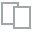
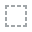
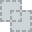
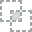
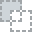
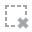
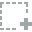
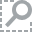
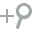
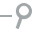
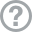
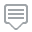
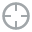
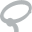
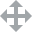
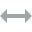
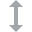
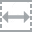
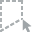
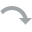
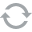
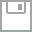
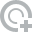
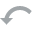
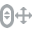
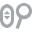
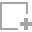
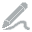
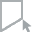
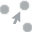
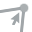
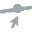

In [ ]:
plot(df)

According to the results it seems even though the most columns have numerical variables they exihibits categroical behaviors.

**Analysis of Numerical Data**

In [ ]:
df.describe().T

count       mean        std  \
Marital status                                  4424.0   1.178571   0.605747   
Application mode                                4424.0   6.886980   5.298964   
Application order                               4424.0   1.727848   1.313793   
Course                                          4424.0   9.899186   4.331792   
Daytime/evening attendance                      4424.0   0.890823   0.311897   
Previous qualification                          4424.0   2.531420   3.963707   
Nacionality                                     4424.0   1.254521   1.748447   
Mother's qualification                          4424.0  12.322107   9.026251   
Father's qualification                          4424.0  16.455244  11.044800   
Mother's occupation                             4424.0   7.317812   3.997828   
Father's occupation                             4424.0   7.819168   4.856692   
Displaced                                       4424.0   0.548373   0.497711   
Educational special needs                       4424.0   0.011528   0.106760   
Debtor                                          4424.0   0.113698   0.317480   
Tuition fees up to date                         4424.0   0.880651   0.324235   
Gender                                          4424.0   0.351718   0.477560   
Scholarship holder                              4424.0   0.248418   0.432144   
Age at enrollment                               4424.0  23.265145   7.587816   
International                                   4424.0   0.024864   0.155729   
Curricular units 1st sem (credited)             4424.0   0.709991   2.360507   
Curricular units 1st sem (enrolled)             4424.0   6.270570   2.480178   
Curricular units 1st sem (evaluations)          4424.0   8.299051   4.179106   
Curricular units 1st sem (approved)             4424.0   4.706600   3.094238   
Curricular units 1st sem (grade)                4424.0  10.640822   4.843663   
Curricular units 1st sem (without evaluations)  4424.0   0.137658   0.690880   
Curricular units 2nd sem (credited)             4424.0   0.541817   1.918546   
Curricular units 2nd sem (enrolled)             4424.0   6.232143   2.195951   
Curricular units 2nd sem (evaluations)          4424.0   8.063291   3.947951   
Curricular units 2nd sem (approved)             4424.0   4.435805   3.014764   
Curricular units 2nd sem (grade)                4424.0  10.230206   5.210808   
Curricular units 2nd sem (without evaluations)  4424.0   0.150316   0.753774   
Unemployment rate                               4424.0  11.566139   2.663850   
Inflation rate                                  4424.0   1.228029   1.382711   
GDP                                             4424.0   0.001969   2.269935   

                                                  min    25%        50%  \
Marital status                                   1.00   1.00   1.000000   
Application mode                                 1.00   1.00   8.000000   
Application order                                0.00   1.00   1.000000   
Course                                           1.00   6.00  10.000000   
Daytime/evening attendance                       0.00   1.00   1.000000   
Previous qualification                           1.00   1.00   1.000000   
Nacionality                                      1.00   1.00   1.000000   
Mother's qualification                           1.00   2.00  13.000000   
Father's qualification                           1.00   3.00  14.000000   
Mother's occupation                              1.00   5.00   6.000000   
Father's occupation                              1.00   5.00   8.000000   
Displaced                                        0.00   0.00   1.000000   
Educational special needs                        0.00   0.00   0.000000   
Debtor                                           0.00   0.00   0.000000   
Tuition fees up to date                          0.00   1.00   1.000000   
Gender                                          

**Understanding the Target Variable**

As the next step we are going to understand our target variable.

In [ ]:
df.Target.value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

According to the results there are three categories in the target variable 'Graduate', 'Dropout' and 'Enrolled' but as our focus is on training a model to predict if a student will graduate or not, we are going to keep all the 'Enrolled' rows for prediction and use rest of the rows to train and test the model.

In [ ]:
predition_df = df.loc[df['Target'] == 'Enrolled']

In [ ]:
predition_df.head()

Marital status  Application mode  Application order  Course  \
16               1                 9                  1      10   
19               1                 1                  1      16   
21               1                 9                  4      13   
25               1                 1                  1      10   
27               1                 1                  1       6   

    Daytime/evening attendance  Previous qualification  Nacionality  \
16                           1                       1            1   
19                           1                       1            1   
21                           1                       1            1   
25                           1                       1            1   
27                           1                       1            1   

    Mother's qualification  Father's qualification  Mother's occupation  ...  \
16                      13                      28                    6  ...   
19                      13                      14                    8  ...   
21                       1                      28                    5  ...   
25                      13                      28                   10  ...   
27                      13                      14                    4  ...   

    Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
16                                    0                                    6   
19                                    0                                    7   
21                                    0                                    8   
25                                    0                                    6   
27                                    0                                    5   

    Curricular units 2nd sem (evaluations)  \
16                                      14   
19                                       8   
21                                       9   
25                                      12   
27                                       7   

    Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
16                                    2                            11.000   
19                                    6                            13.500   
21                                    8                            11.425   
25                                    4                            11.000   
27                                    4                            13.000   

    Curricular units 2nd sem (without evaluations)  Unemployment rate  \
16                                               0               10.8   
19                                               0               16.2   
21                                               0               12.7   
25                                               0                7.6   
27                                               0                9.4   

    Inflation rate   GDP    Target  
16             1.4  1.74  Enrolled  
19             0.3 -0.92  Enrolled  
21             3.7 -1.70  Enrolled  
25             2.6  0.32  Enrolled  
27            -0.8 -3.12  Enrolled  

[5 rows x 35 columns]

In [ ]:
predition_df.shape

(794, 35)

After seperating the data set for prediction we can see there are 794 rows availabe for prediction purposes. Let's now seperate the rest of the data set for training and testing.

In [ ]:
df = df.loc[df['Target'] != 'Enrolled']

In [ ]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
df.shape

(3630, 35)

So now we only have 3630 rows for the purpose of training and testing.

**Label Encoding**

Since we cannot feed categorical data in to machine learning models we are going to encode our target variable in to a numerical variable.

In [ ]:
#converting categorical data columns into numerical data columns
labelencoder = LabelEncoder()
df['Target'] = labelencoder.fit_transform(df['Target'])
df.head()


Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       1  
2             1.4  1.74       0  
3            -0.8 -3.12       1  
4            -0.3  0.79       1  

[5 rows x 35 columns]

In [ ]:
df.Target.unique()

array([0, 1])

We have encoded two target categories as 0 and 1. Let's now see how each variable behave according this two categories.

In [ ]:
df.groupby('Target').agg(['mean', 'median'])

Marital status        Application mode        Application order         \
                 mean median             mean median              mean median   
Target                                                                          
0            1.261084    1.0         8.342013    9.0          1.593244    1.0   
1            1.134903    1.0         5.824808    4.0          1.851064    1.0   

          Course        Daytime/evening attendance         ...  \
            mean median                       mean median  ...   
Target                                                     ...   
0       9.898663   10.0                   0.854328    1.0  ...   
1       9.959258   11.0                   0.909009    1.0  ...   

       Curricular units 2nd sem (grade)         \
                                   mean median   
Target                                           
0                              5.899339    0.0   
1                             12.697276   13.0   

       Curricular units 2nd sem (without evaluations)         \
                                                 mean median   
Target                                                         
0                                            0.237861    0.0   
1                                            0.080579    0.0   

       Unemployment rate        Inflation rate              GDP         
                    mean median           mean median      mean median  
Target                                                                  
0              11.616397   11.1       1.283955    1.4 -0.150859   0.32  
1              11.639339   11.1       1.197918    0.6  0.081833   0.79  

[2 rows x 68 columns]

While some columns exihibit clear differences between two categories there are some columns which exihibit quite similar behaviors.

In [ ]:
labelencoder = LabelEncoder()
predition_df['Target'] = labelencoder.fit_transform(predition_df['Target'])
predition_df.head()

Marital status  Application mode  Application order  Course  \
16               1                 9                  1      10   
19               1                 1                  1      16   
21               1                 9                  4      13   
25               1                 1                  1      10   
27               1                 1                  1       6   

    Daytime/evening attendance  Previous qualification  Nacionality  \
16                           1                       1            1   
19                           1                       1            1   
21                           1                       1            1   
25                           1                       1            1   
27                           1                       1            1   

    Mother's qualification  Father's qualification  Mother's occupation  ...  \
16                      13                      28                    6  ...   
19                      13                      14                    8  ...   
21                       1                      28                    5  ...   
25                      13                      28                   10  ...   
27                      13                      14                    4  ...   

    Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
16                                    0                                    6   
19                                    0                                    7   
21                                    0                                    8   
25                                    0                                    6   
27                                    0                                    5   

    Curricular units 2nd sem (evaluations)  \
16                                      14   
19                                       8   
21                                       9   
25                                      12   
27                                       7   

    Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
16                                    2                            11.000   
19                                    6                            13.500   
21                                    8                            11.425   
25                                    4                            11.000   
27                                    4                            13.000   

    Curricular units 2nd sem (without evaluations)  Unemployment rate  \
16                                               0               10.8   
19                                               0               16.2   
21                                               0               12.7   
25                                               0                7.6   
27                                               0                9.4   

    Inflation rate   GDP  Target  
16             1.4  1.74       0  
19             0.3 -0.92       0  
21             3.7 -1.70       0  
25             2.6  0.32       0  
27            -0.8 -3.12       0  

[5 rows x 35 columns]

Using above code we have also encoded the prediction data set.

**Visualization**

Next let's visualize the data to see relationships between independent variables and target variable.

Text(0.5, 1.0, 'Correlation between continuous independent variables and target variable')

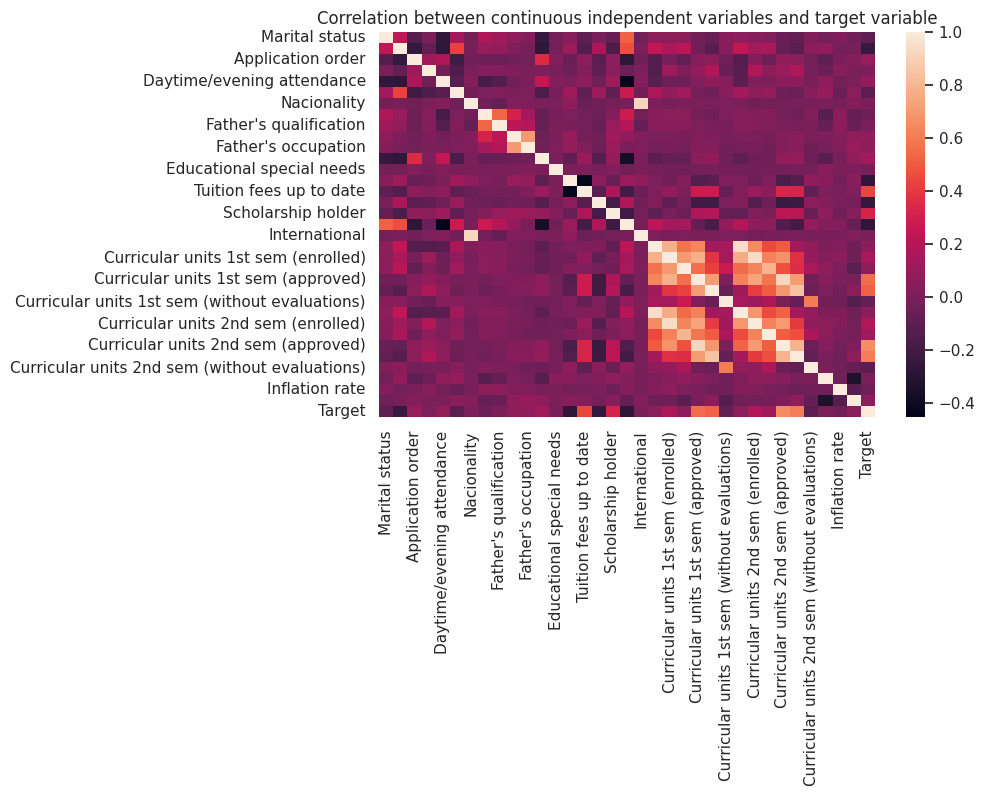

In [ ]:
fig = plt.figure(figsize=(8,5))
g = sns.heatmap(df.corr());
g.set_title('Correlation between continuous independent variables and target variable')

While the correlation matrix gives a correlation each variable with each other variable, we specifically needs to understand the relationship between the target variable and all the independent variables. So, we are going to direclty plot the relationship between target variabl and all the other variables.


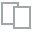
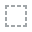
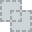
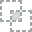
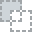
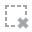
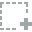
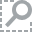
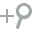
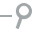
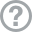
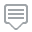
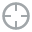
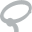
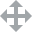
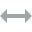
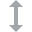
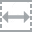
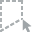
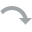
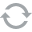
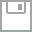
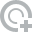
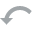
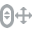
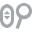
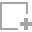
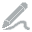
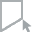
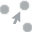
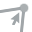
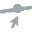

In [ ]:
plot_correlation(df, "Target", value_range=[0.5, 1])

This indicates there is a direct correlation between curricular units approved, graded first two semesters and the target variable. Next let's visualize above identified variables to see how they behave as well as few other numerical variables to support the analysis.

Text(0.5, 1.0, 'Distribution of Curricular units 1st sem (approved)')

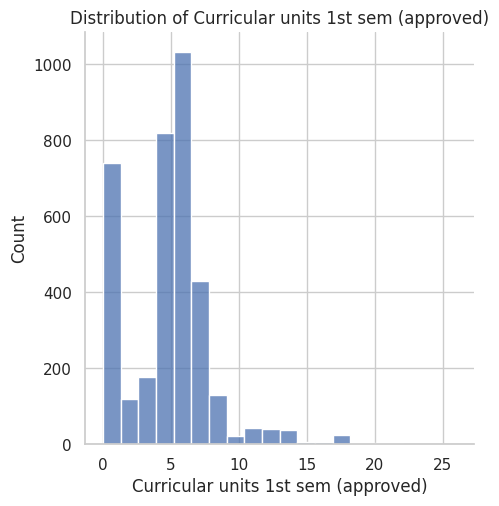

In [ ]:
sns.displot(data = df, x = 'Curricular units 1st sem (approved)', bins = 20)
plt.title('Distribution of Curricular units 1st sem (approved)')

According to the distribution it's clear that most of the students have been approved for below 10 units and there is a considerable amount of students who have not been approved for any subject in the first semester.

Text(0.5, 1.0, 'Distribution of Curricular units 2nd sem (approved)')

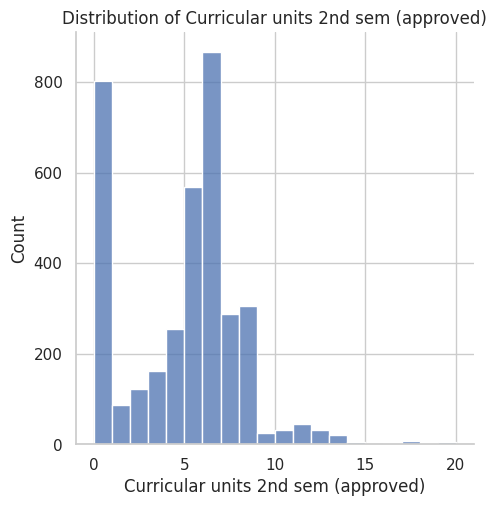

In [ ]:
sns.displot(data = df, x = 'Curricular units 2nd sem (approved)', bins = 20)
plt.title('Distribution of Curricular units 2nd sem (approved)')

Similar patterns to semester 1 can be identified in the semester 2 as well. Most of the students has been approved for units less then 10 units and there is a large portion of students who have not been approved even a single unit during the second semester.

Text(0.5, 1.0, 'Distribution of Curricular units 1st sem (grade)')

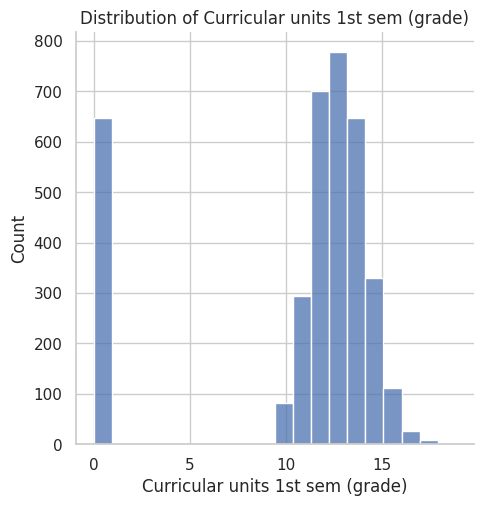

In [ ]:
sns.displot(data = df, x = 'Curricular units 1st sem (grade)', bins = 20)
plt.title('Distribution of Curricular units 1st sem (grade)')

Text(0.5, 1.0, 'Distribution of Curricular units 2nd sem (grade)')

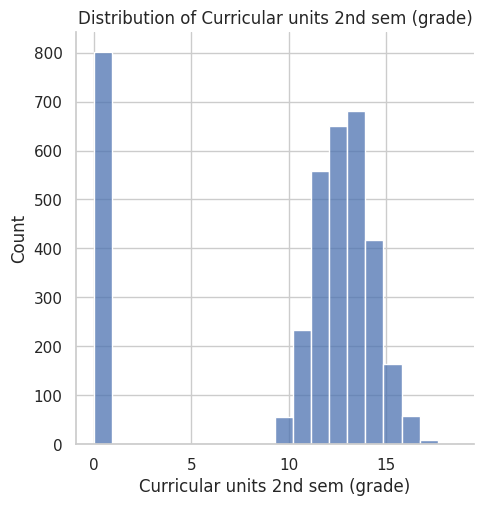

In [ ]:
sns.displot(data = df, x = 'Curricular units 2nd sem (grade)', bins = 20)
plt.title('Distribution of Curricular units 2nd sem (grade)')

Text(0.5, 1.0, 'Distribution of Age at Enrollment')

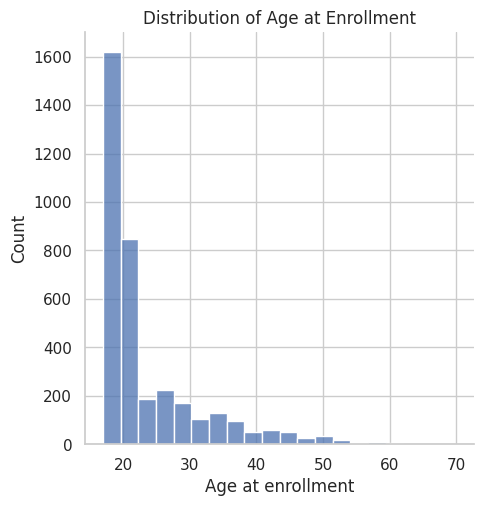

In [ ]:
sns.displot(data = df, x = 'Age at enrollment', bins = 20)
plt.title('Distribution of Age at Enrollment')

The distribution of age at enrolment is right skewed. And most of the students are around 20 yrs old when they enroll.

Text(0.5, 1.0, 'Distribution of Unemployment rate')

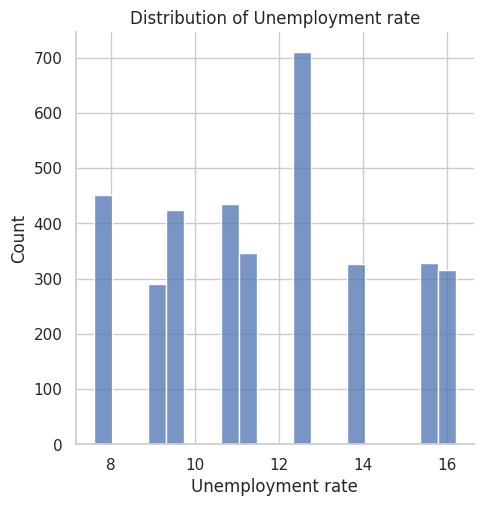

In [ ]:
sns.displot(data = df, x = 'Unemployment rate', bins = 20)
plt.title('Distribution of Unemployment rate')

Text(0.5, 1.0, 'Distribution of Inflation rate')

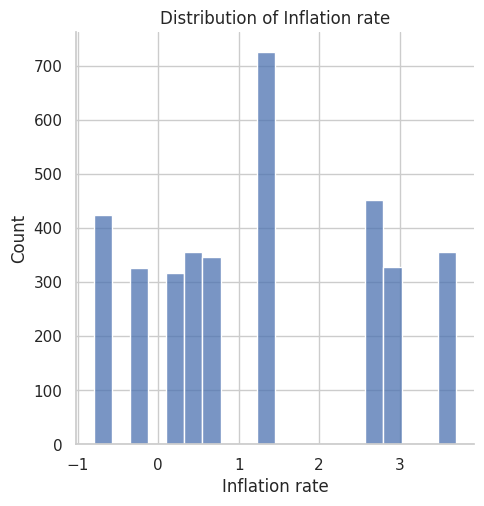

In [ ]:
sns.displot(data = df, x = 'Inflation rate', bins = 20)
plt.title('Distribution of Inflation rate')

Text(0.5, 1.0, 'Distribution of GDP')

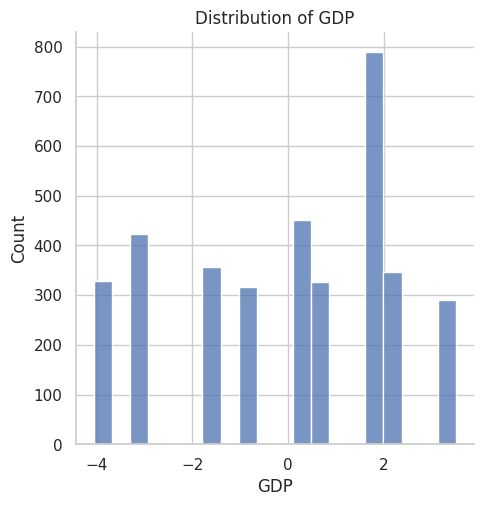

In [ ]:
sns.displot(data = df, x = 'GDP', bins = 20)
plt.title('Distribution of GDP')

One thing to note down in the data columns is that while some of the columns exihibits qualities of a normal distribution most of them don't follow a normal distribution due to this we need normalize the data before further analysis.

**Normalization**

Normalization is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. We are going to use the min-max scaler as the distribution of the data set is not normal.

In [ ]:
scaler = MinMaxScaler()
num_scaled = scaler.fit_transform(df)
df = pd.DataFrame(num_scaled, columns = df.columns)

In [ ]:
df.head()

Marital status  Application mode  Application order  Course  \
0             0.0          0.411765           0.833333  0.0625   
1             0.0          0.294118           0.166667  0.6250   
2             0.0          0.000000           0.833333  0.2500   
3             0.0          0.411765           0.333333  0.8750   
4             0.2          0.647059           0.166667  0.1250   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         0.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.428571                0.272727             0.161290  ...   
1                0.000000                0.060606             0.096774  ...   
2                0.750000                0.787879             0.290323  ...   
3                0.785714                0.787879             0.161290  ...   
4                0.750000                0.818182             0.290323  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                              0.00000   
1                                  0.0                              0.26087   
2                                  0.0                              0.26087   
3                                  0.0                              0.26087   
4                                  0.0                              0.26087   

   Curricular units 2nd sem (evaluations)  \
0                                0.000000   
1                                0.181818   
2                                0.000000   
3                                0.303030   
4                                0.181818   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                 0.00                          0.000000   
1                                 0.30                          0.735897   
2                                 0.00                          0.000000   
3                                 0.25                          0.667692   
4                                 0.30                          0.700000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           0.732558   
2                                             0.0           0.372093   
3                                             0.0           0.209302   
4                                             0.0           0.732558   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     0.0  
1        0.111111  0.640687     1.0  
2        0.488889  0.766182     0.0  
3        0.000000  0.124174     1.0  
4        0.111111  0.640687     1.0  

[5 rows x 35 columns]

In [ ]:
num_scaled_prediction = scaler.fit_transform(predition_df)
predition_df = pd.DataFrame(num_scaled_prediction, columns = predition_df.columns)

In [ ]:
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     0.0  
1        0.244444  0.414795     0.0  
2        1.000000  0.311757     0.0  
3        0.755556  0.578600     0.0  
4        0.000000  0.124174     0.0  

[5 rows x 35 columns]

In [ ]:
#seperate independent variables and dependent variable
x = df.drop("Target", axis = 1)
y = df.loc[:, "Target"]

Let's visualize the data after normalizing to see how they behave.

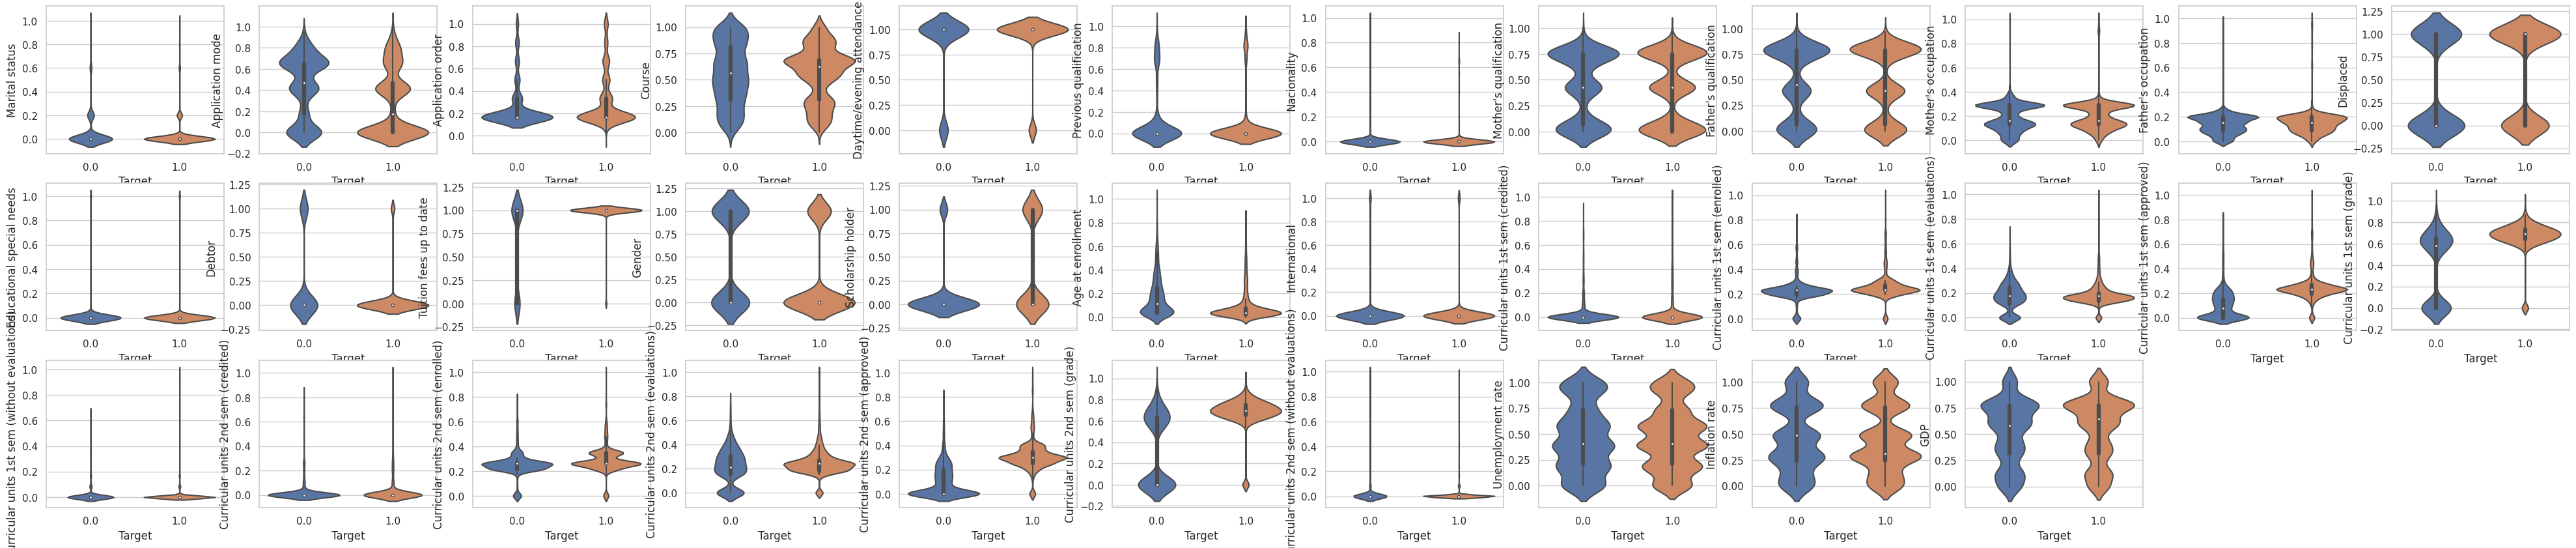

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(50,10))
a = 1
for i in x.columns:
  plt.subplot(3,12,a)
  sns.violinplot(x='Target',y=i,data=df)
  a = a + 1
plt.show()

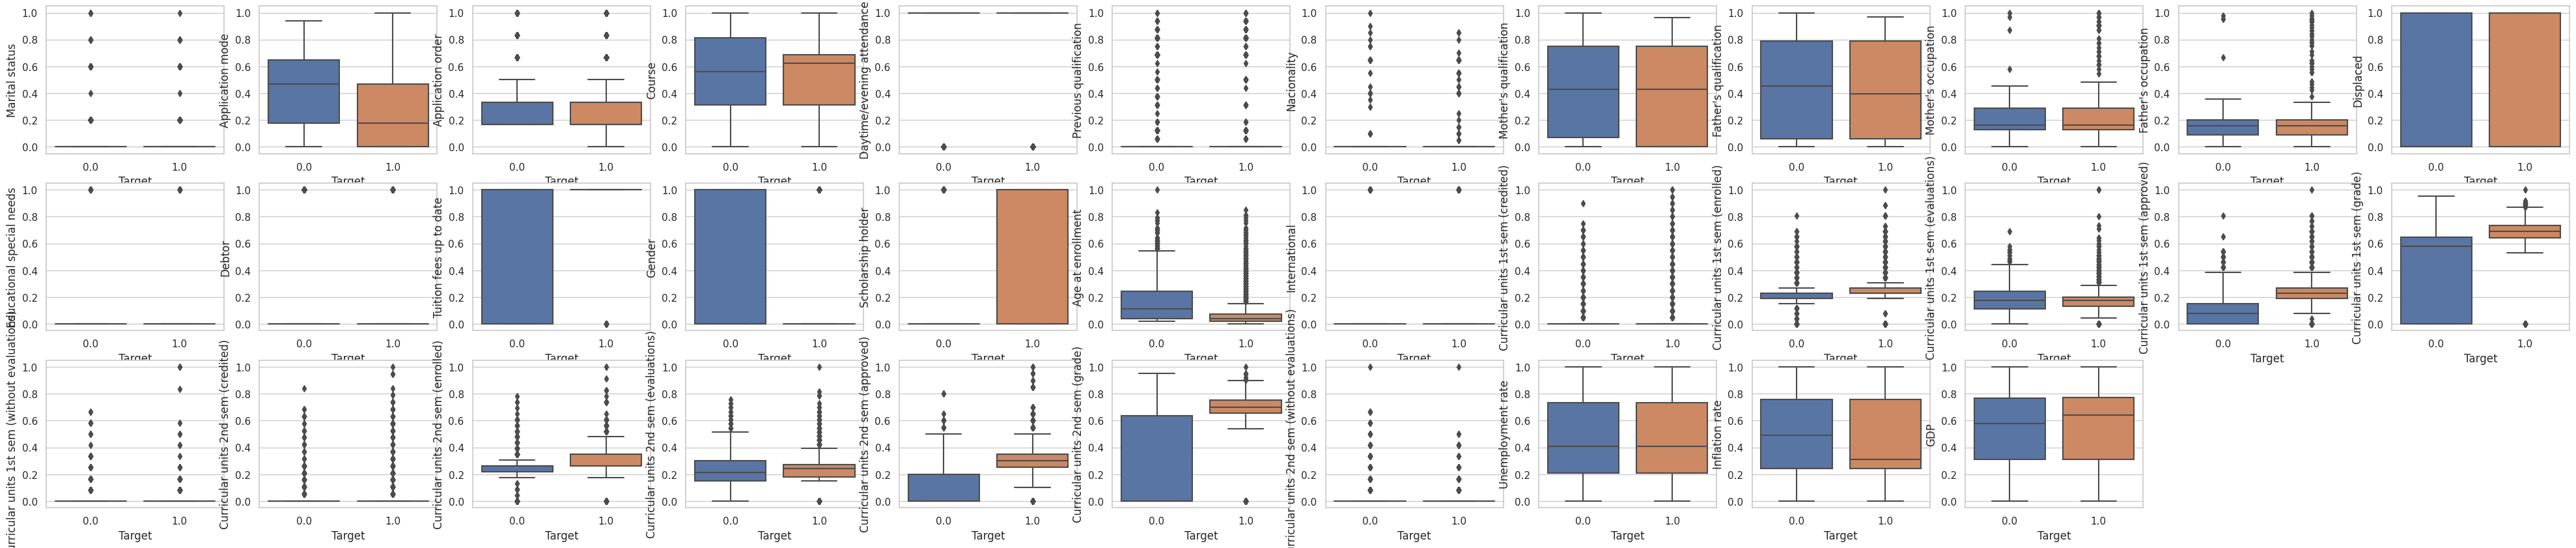

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(50,10))
a = 1
for i in x.columns:
  plt.subplot(3,12,a)
  sns.boxplot(x='Target',y=i,data=df)
  a = a + 1
plt.show()

According the results from visualizations it is clear that there are many outliers present in the data set. So, as the next step ouliers have been removed.

**Outlier Detection**

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty.

<Axes: >

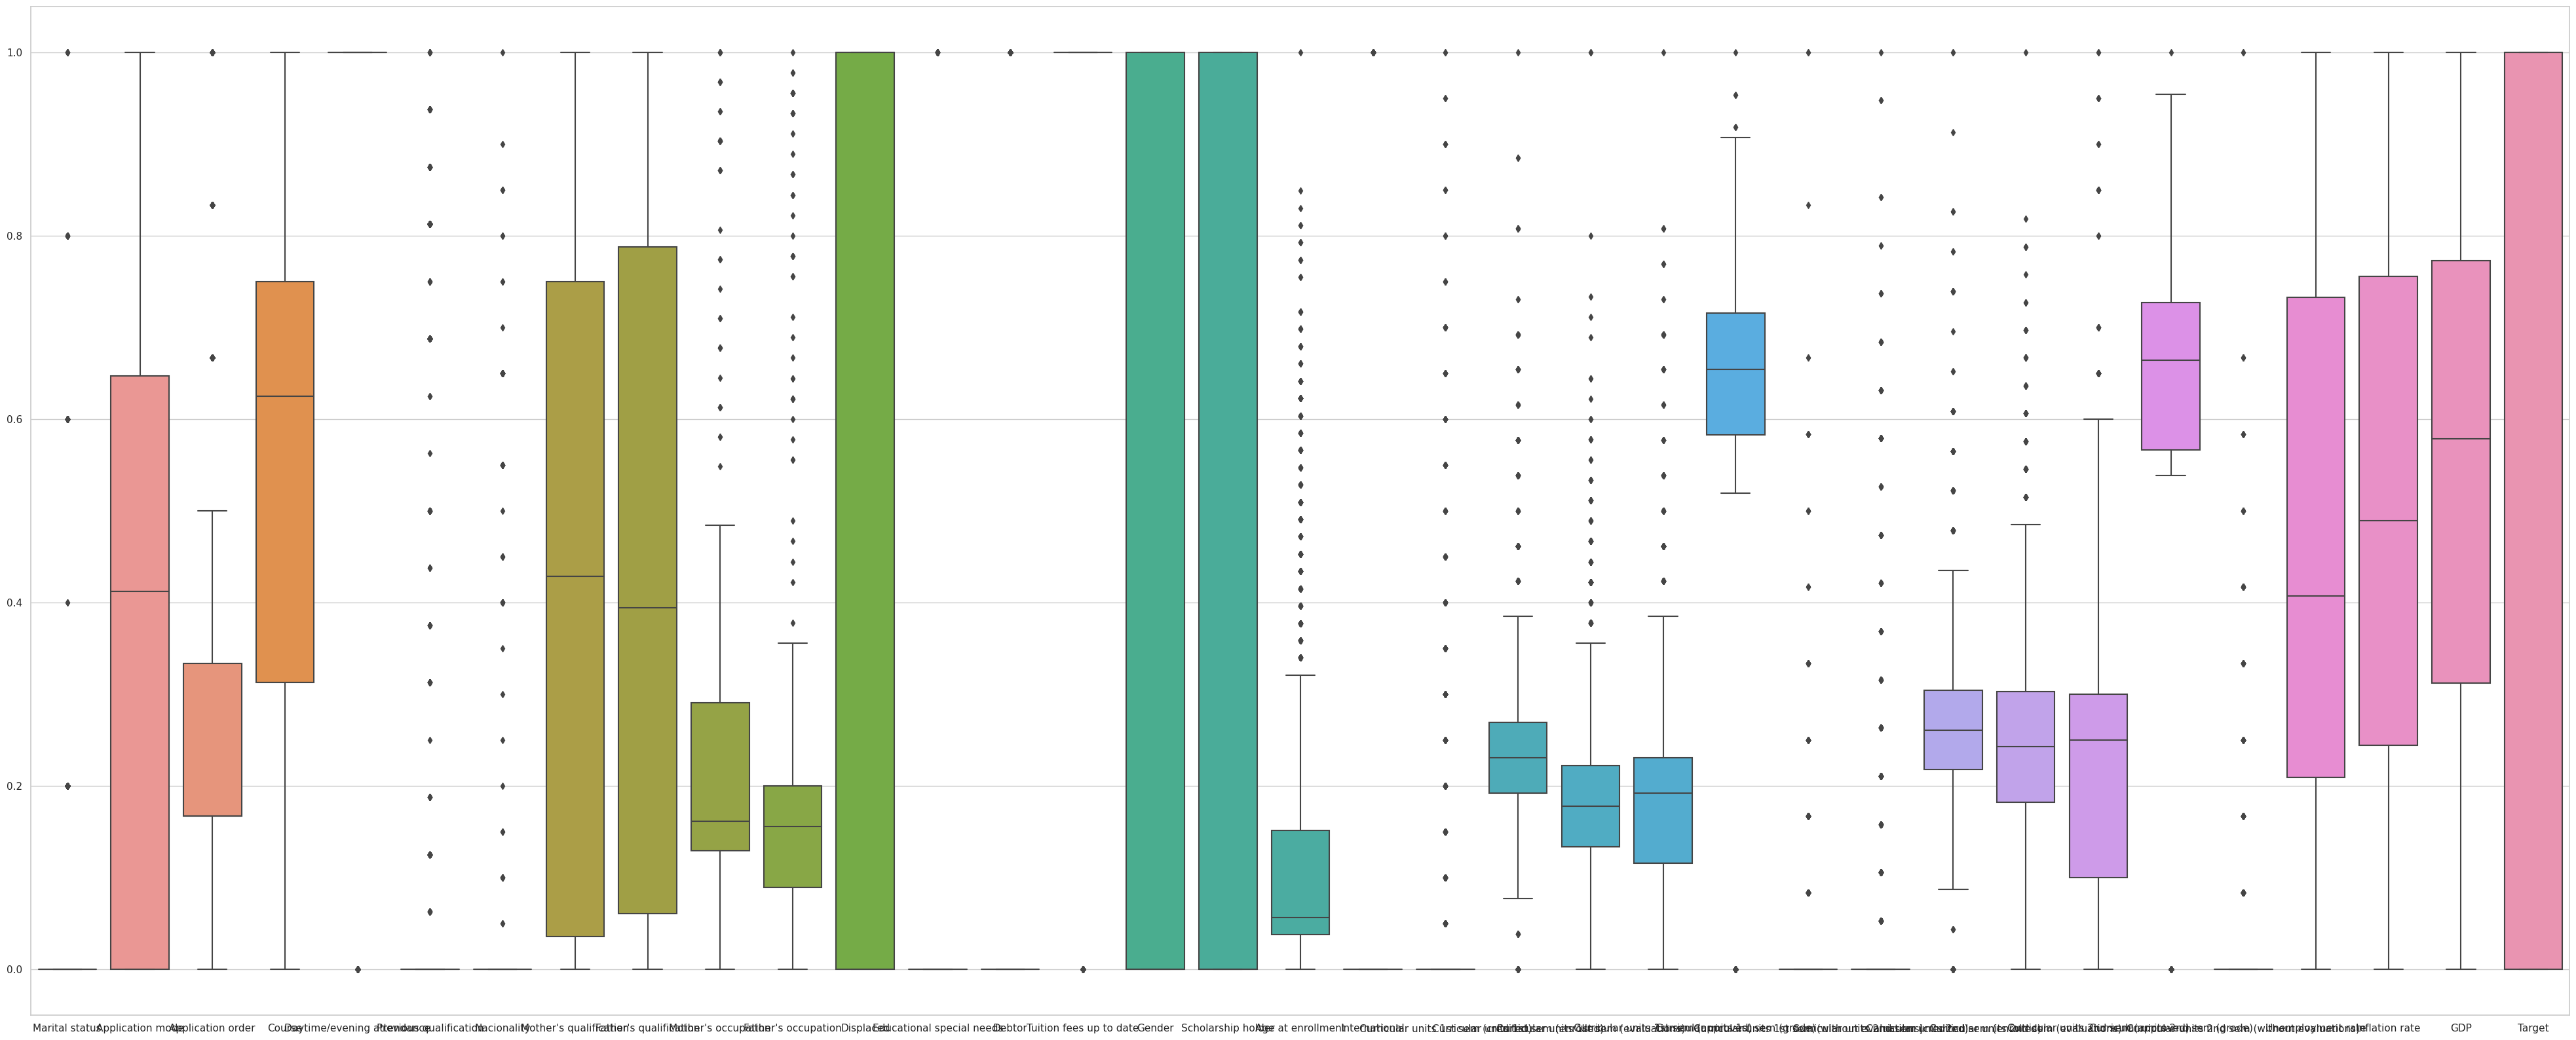

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df)

According to the box plots of each column data, it is evident that there are lot of outliers present in most of the columns.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Marital status                                    0.000000
Application mode                                  0.647059
Application order                                 0.166667
Course                                            0.437500
Daytime/evening attendance                        0.000000
Previous qualification                            0.000000
Nacionality                                       0.000000
Mother's qualification                            0.714286
Father's qualification                            0.727273
Mother's occupation                               0.161290
Father's occupation                               0.111111
Displaced                                         1.000000
Educational special needs                         0.000000
Debtor                                            0.000000
Tuition fees up to date                           0.000000
Gender                                            1.000000
Scholarship holder                                1.0000

In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(1229, 35)

Once we removed the outliers the data set has reduced in size considerably and this could be a potential issue in the analysis.

<Axes: >

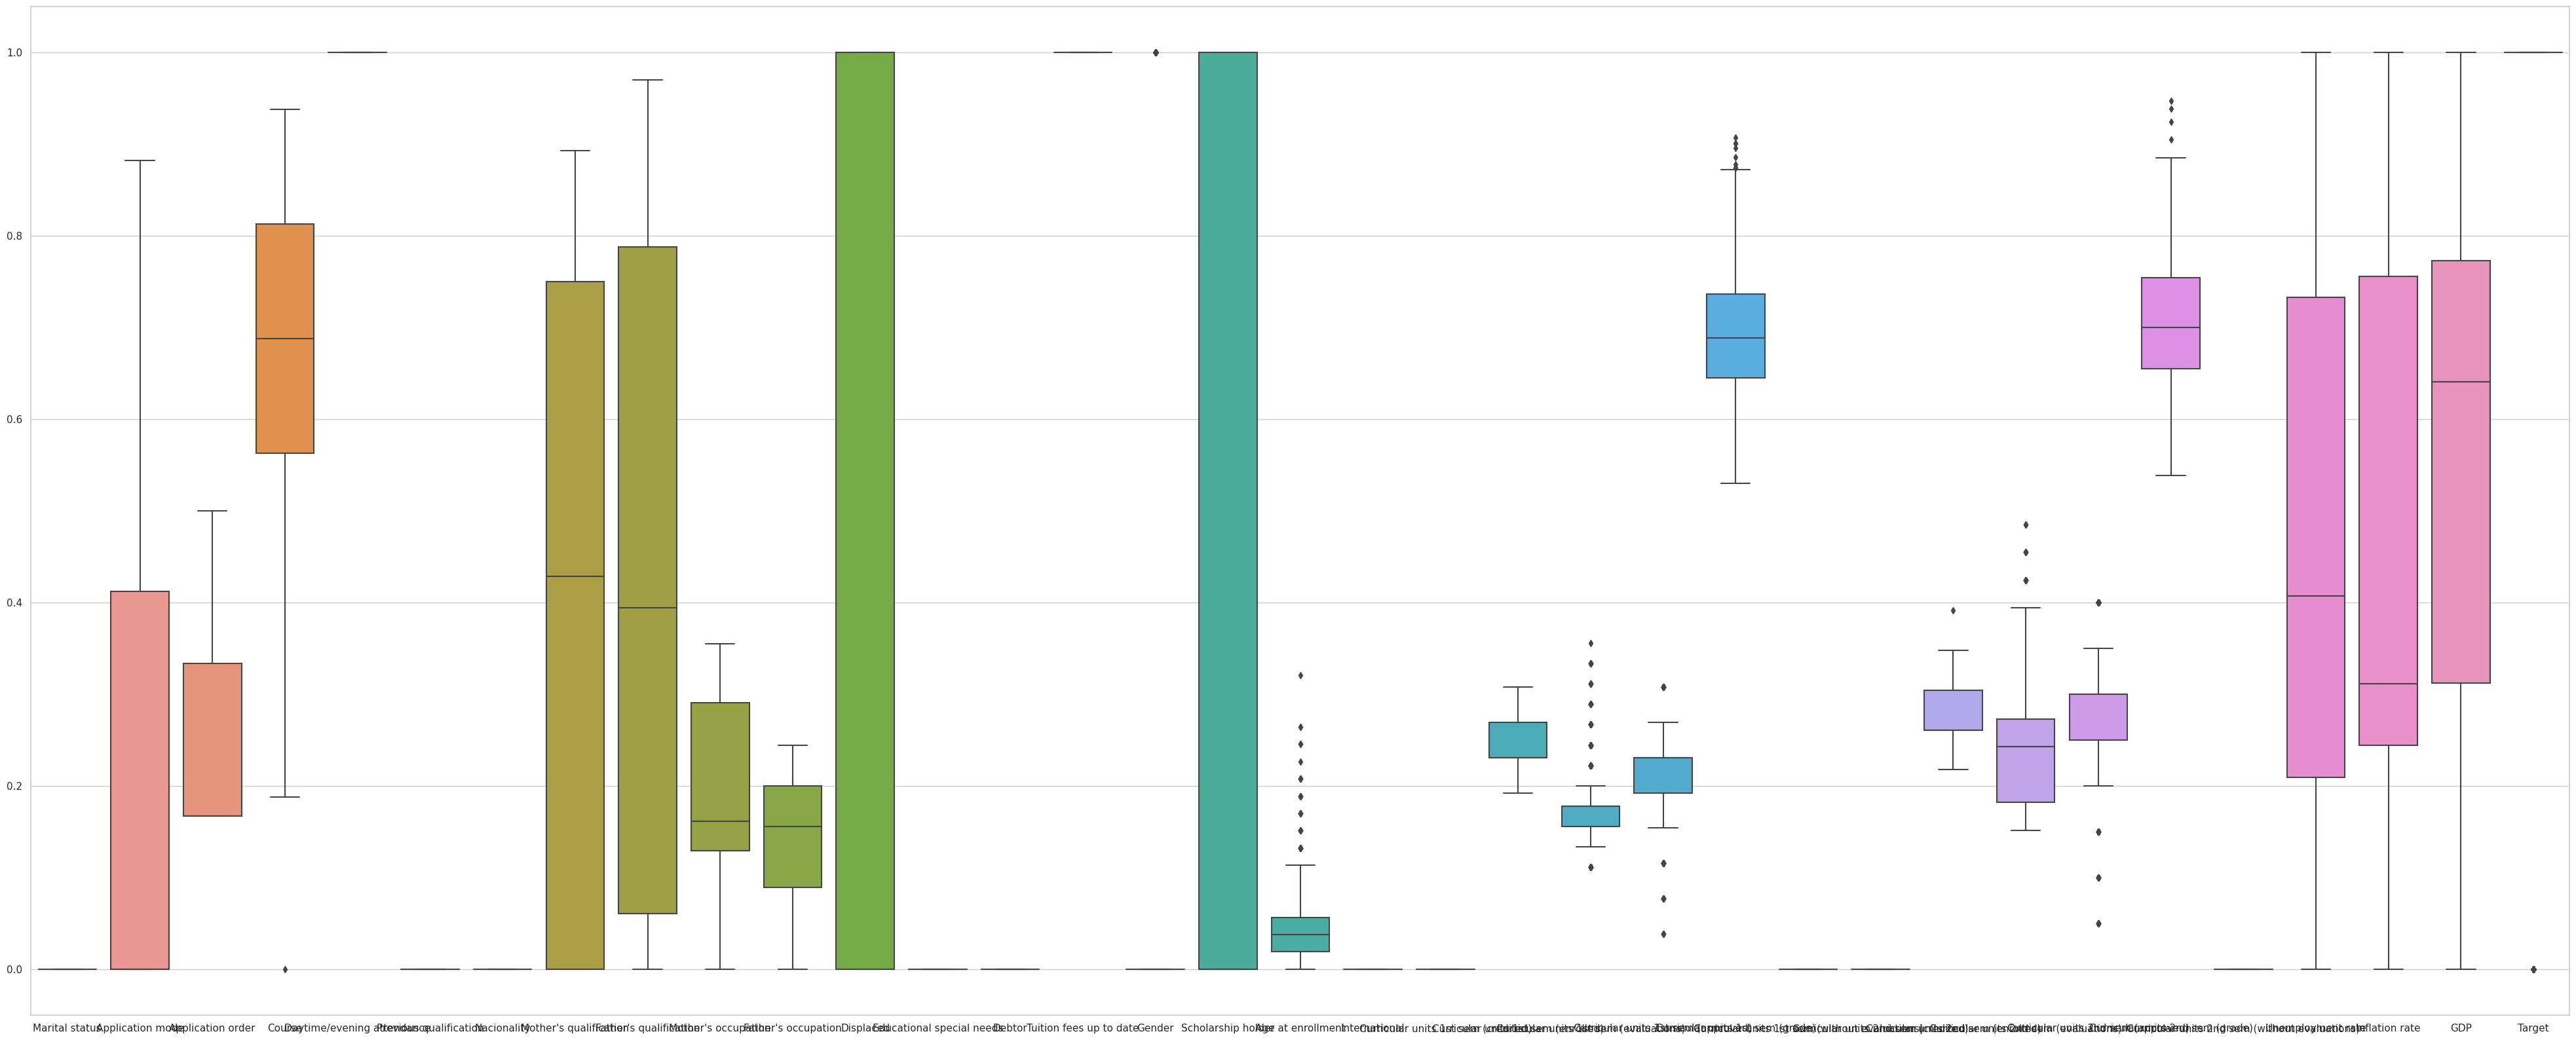

In [ ]:
plt.figure(figsize=(50,20))
sns.boxplot(data=df)

After outlier treatement, most of the extreme cases of outliers have been removed from the data set.

**Dividing data set**

Next let's split the data set into training and testing sets.

In [ ]:
#seperate independent variables and dependent variable
target = 'Target'
x = df.drop('Target', axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#seperate independent variables from the prediction data set
x_prediction = predition_df.drop('Target', axis = 1)
y_prediction = predition_df['Target']

**Standardising the data set**

In [ ]:
#standardising data
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.fit_transform(x_test)

In [ ]:
#standardising prediction data
x_prediction = standard_scaler.fit_transform(x_prediction)

**Deciding optimal no of principle components**

In [ ]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
d = np.argmax(cumsum >= 0.95) + 1
d

18

**Principal component Analysis**

In [ ]:
#Principal Component Analysis
pca = PCA(n_components=18)
principalComponents_train = pca.fit_transform(x_train)
principalComponents_test = pca.fit_transform(x_test)

In [ ]:
principalComponents_prediction = pca.fit_transform(x_prediction)

**Random forest classifier**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(principalComponents_train, y_train)
y_prediction = random_forest.predict(principalComponents_train)
random_forest.score(principalComponents_train, y_train)
acc_random_forest = round(random_forest.score(principalComponents_train, y_train) * 100, 2)
print(f"Training Accuracy of Random Forest Classifier: {acc_random_forest}%")

Training Accuracy of Random Forest Classifier: 100.0%


The training accuracy is 100.0%. And this seems to be a case of overfitting of training data.

In [ ]:
predictions = random_forest.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[130,   0],
       [  0, 853]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       130
         1.0      1.000     1.000     1.000       853

    accuracy                          1.000       983
   macro avg      1.000     1.000     1.000       983
weighted avg      1.000     1.000     1.000       983



In [ ]:
y_prediction = random_forest.predict(principalComponents_test)
random_forest.score(principalComponents_test, y_test)
acc_random_forest_test = round(random_forest.score(principalComponents_test, y_test) * 100, 2)
print(f"Testing Accuracy of Random Forest Classifier: {acc_random_forest_test}%")

Testing Accuracy of Random Forest Classifier: 90.65%


The testing accuracy is only 87.4%, this indeed proves that the model is overfitting.

In [ ]:
predictions = random_forest.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[ 13,  20],
       [  3, 210]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.812     0.394     0.531        33
         1.0      0.913     0.986     0.948       213

    accuracy                          0.907       246
   macro avg      0.863     0.690     0.739       246
weighted avg      0.900     0.907     0.892       246



**Gaussian Naive Bayes Classifier**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(principalComponents_train, y_train)
y_prediction = gaussian.predict(principalComponents_train)
gaussian.score(principalComponents_train, y_train)
acc_gaussian = round(gaussian.score(principalComponents_train, y_train) * 100, 2)
print(f"Training Accuracy for Gaussian Naive Bayes: {acc_gaussian}%")

Training Accuracy for Gaussian Naive Bayes: 90.23%


In [ ]:
predictions = gaussian.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 68,  62],
       [ 34, 819]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.667     0.523     0.586       130
         1.0      0.930     0.960     0.945       853

    accuracy                          0.902       983
   macro avg      0.798     0.742     0.765       983
weighted avg      0.895     0.902     0.897       983



In [ ]:
y_prediction = gaussian.predict(principalComponents_test)
gaussian.score(principalComponents_test, y_test)
acc_gaussian_test = round(gaussian.score(principalComponents_test, y_test) * 100, 2)
print(f"Test Accuracy for Gaussian Naive Bayes Classifier: {acc_gaussian_test}%")

Test Accuracy for Gaussian Naive Bayes Classifier: 87.4%


In [ ]:
predictions = gaussian.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[ 11,  22],
       [  9, 204]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.550     0.333     0.415        33
         1.0      0.903     0.958     0.929       213

    accuracy                          0.874       246
   macro avg      0.726     0.646     0.672       246
weighted avg      0.855     0.874     0.860       246



**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(principalComponents_train, y_train)
y_pred = logreg.predict(principalComponents_train)
acc_log = round(logreg.score(principalComponents_train, y_train) * 100, 2)
print(f"Training Accuracy for Logistic Regression: {acc_log}%")

Training Accuracy for Logistic Regression: 91.76%


In [ ]:
predictions = logreg.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 65,  65],
       [ 16, 837]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.802     0.500     0.616       130
         1.0      0.928     0.981     0.954       853

    accuracy                          0.918       983
   macro avg      0.865     0.741     0.785       983
weighted avg      0.911     0.918     0.909       983



In [ ]:
y_pred = logreg.predict(principalComponents_test)
acc_log_test = round(logreg.score(principalComponents_test, y_test) * 100, 2)
print(f"Testing accuracy for Logistic Regression: {acc_log_test}%")

Testing accuracy for Logistic Regression: 86.59%


In [ ]:
predictions = logreg.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[ 10,  23],
       [ 10, 203]])

**Decision Tree Classifier**

In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(principalComponents_train,y_train)
y_pred=decisiontree.predict(principalComponents_train)
acc_dt=round(decisiontree.score(principalComponents_train, y_train) * 100, 2)
print(f"Training Accuracy for Decision Tree Classifier: {acc_dt}%")

Training Accuracy for Decision Tree Classifier: 100.0%


The model displays 100% training accuracy, this suggests the model is overfitting.

In [ ]:
predictions = decisiontree.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[130,   0],
       [  0, 853]])

In [ ]:
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       130
         1.0      1.000     1.000     1.000       853

    accuracy                          1.000       983
   macro avg      1.000     1.000     1.000       983
weighted avg      1.000     1.000     1.000       983



In [ ]:
y_pred=decisiontree.predict(principalComponents_test)
acc_dt_test=round(decisiontree.score(principalComponents_test, y_test) * 100, 2)
print(f"Testing Accuracy for Decision Tree Classifier: {acc_dt_test}%")

Testing Accuracy for Decision Tree Classifier: 82.93%


In [ ]:
predictions = decisiontree.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[  9,  24],
       [ 18, 195]])

In [ ]:
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.333     0.273     0.300        33
         1.0      0.890     0.915     0.903       213

    accuracy                          0.829       246
   macro avg      0.612     0.594     0.601       246
weighted avg      0.816     0.829     0.822       246



**Linear SVC**

In [ ]:
svc=LinearSVC()
svc.fit(principalComponents_train,y_train)
Y_pred=svc.predict(principalComponents_train)
acc_svc=round(svc.score(principalComponents_train, y_train) * 100, 2)
print(f"Training Accuracy for Linear SVC: {acc_svc}%")

Training Accuracy for Linear SVC: 91.56%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
predictions = svc.predict(principalComponents_train)
confusion_matrix(y_train, predictions)

array([[ 61,  69],
       [ 14, 839]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_train, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.813     0.469     0.595       130
         1.0      0.924     0.984     0.953       853

    accuracy                          0.916       983
   macro avg      0.869     0.726     0.774       983
weighted avg      0.909     0.916     0.906       983



In [ ]:
Y_pred=svc.predict(principalComponents_test)
acc_svc_test=round(svc.score(principalComponents_test, y_test) * 100, 2)
print(f"Testing Accuracy for Linear SVC: {acc_svc_test}%")

Testing Accuracy for Linear SVC: 85.77%


In [ ]:
predictions = svc.predict(principalComponents_test)
confusion_matrix(y_test, predictions)

array([[  8,  25],
       [ 10, 203]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

         0.0      0.444     0.242     0.314        33
         1.0      0.890     0.953     0.921       213

    accuracy                          0.858       246
   macro avg      0.667     0.598     0.617       246
weighted avg      0.831     0.858     0.839       246



**ROC Curve Random Forest**

Text(0.5, 1.0, 'ROC Random Forest')

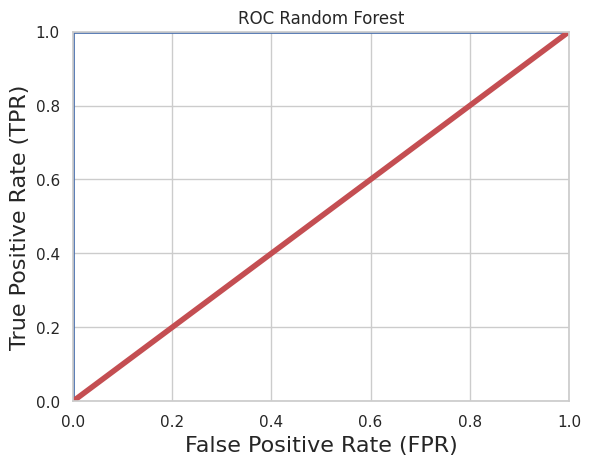

In [ ]:
from sklearn.metrics import roc_curve
y_scores = random_forest.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.title('ROC Random Forest')

Random Forest classifier has a 50% chance of predicting the true value.

**ROC Curve for Decision Tree**

Text(0.5, 1.0, 'ROC Decision Tree')

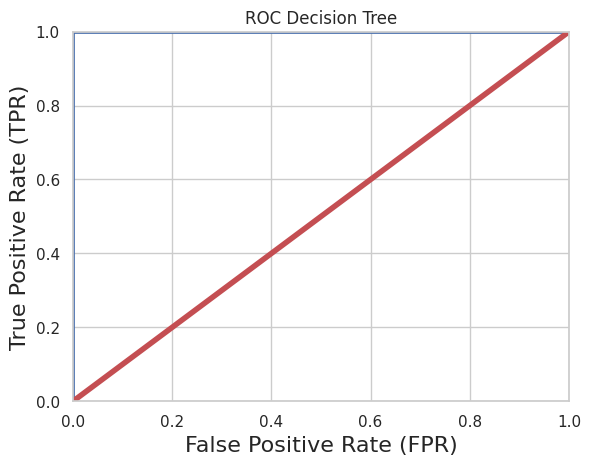

In [ ]:
from sklearn.metrics import roc_curve
y_scores = decisiontree.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.title('ROC Decision Tree')

Decision Tree classifier has around 50% chance of predicting the true value.

**ROC Curve for Gaussian Naive Bayes Classifier**

Text(0.5, 1.0, 'ROC Gaussian Naive Bayes')

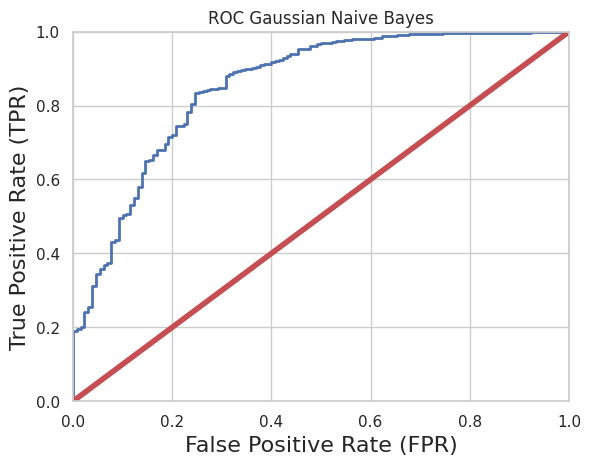

In [ ]:
from sklearn.metrics import roc_curve
y_scores = gaussian.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.title('ROC Gaussian Naive Bayes')

Gaussian Naive Bayes classifier has more than 50% chance of predicting the correct value.

**ROC Curve for Logistic Regression**

Text(0.5, 1.0, 'ROC Logistic Regression')

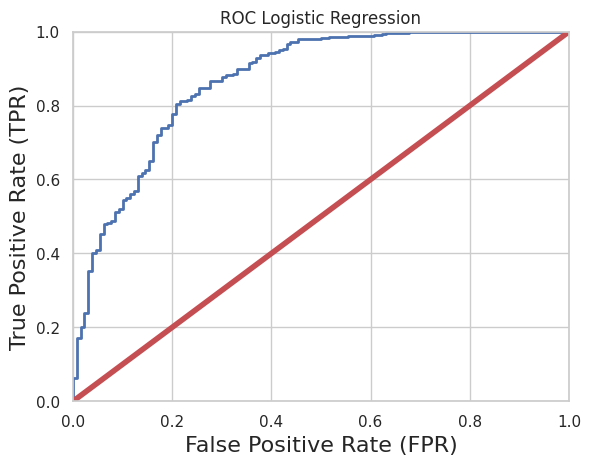

In [ ]:
from sklearn.metrics import roc_curve
y_scores = logreg.predict_proba(principalComponents_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores,pos_label=1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label='label')
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.title('ROC Logistic Regression')

Logistic Regression has more than 50% chance of predicting the correct value.

**SUMMARY**

In [ ]:
y_true=predictions

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'training_Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ]})
result_df = results.sort_values(by='training_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

training_Score
Model                              
Random Forest                100.00
Decision Tree                100.00
Logistic Regression           91.76
LinearSVC                     91.56
gaussian                      90.23

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Testing_Score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Testing_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

Testing_Score
Model                             
Random Forest                90.65
gaussian                     87.40
Logistic Regression          86.59
LinearSVC                    85.77
Decision Tree                82.93

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression',
              'Random Forest',
              'gaussian',
              'Decision Tree',
              'LinearSVC'
              ],
    'Score': [ acc_log, acc_random_forest, acc_gaussian, acc_dt ,acc_svc ],
    'Test_score': [ acc_log_test, acc_random_forest_test, acc_gaussian_test, acc_dt_test ,acc_svc_test ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(9)

Score  Test_score
Model                                  
Random Forest        100.00       90.65
Decision Tree        100.00       82.93
Logistic Regression   91.76       86.59
LinearSVC             91.56       85.77
gaussian              90.23       87.40

Overall Random Forest algorith has performed considerably well compared to other algorithms.

**Making predictions on the enrolled data set**

Let's now use trained machine learning algorithms to make predictions.

**Random Forest Predictions**

In [ ]:
y_rf_prediction = random_forest.predict(principalComponents_prediction)
predition_df['Target'] = y_rf_prediction
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     1.0  
1        0.244444  0.414795     1.0  
2        1.000000  0.311757     1.0  
3        0.755556  0.578600     1.0  
4        0.000000  0.124174     1.0  

[5 rows x 35 columns]

Text(0.5, 1.0, 'Distribution of Predicted Outcome - Random Forest')

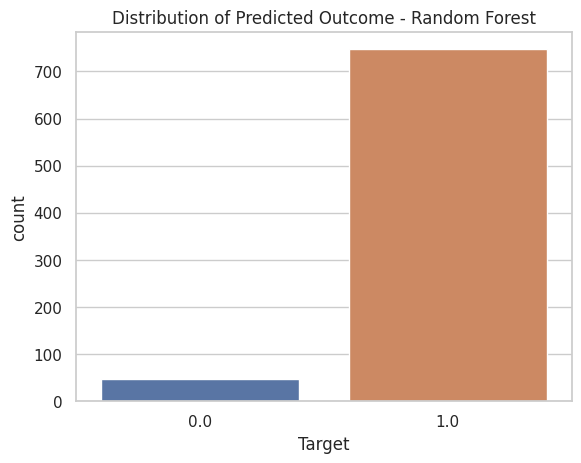

In [ ]:
sns.countplot(x = predition_df["Target"])
plt.title("Distribution of Predicted Outcome - Random Forest")

**Decision Tree Predictions**

In [ ]:
y_dt_prediction = decisiontree.predict(principalComponents_prediction)
predition_df['Target'] = y_dt_prediction
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     1.0  
1        0.244444  0.414795     1.0  
2        1.000000  0.311757     1.0  
3        0.755556  0.578600     1.0  
4        0.000000  0.124174     1.0  

[5 rows x 35 columns]

Text(0.5, 1.0, 'Distribution of Predicted Outcome - Decision Tree')

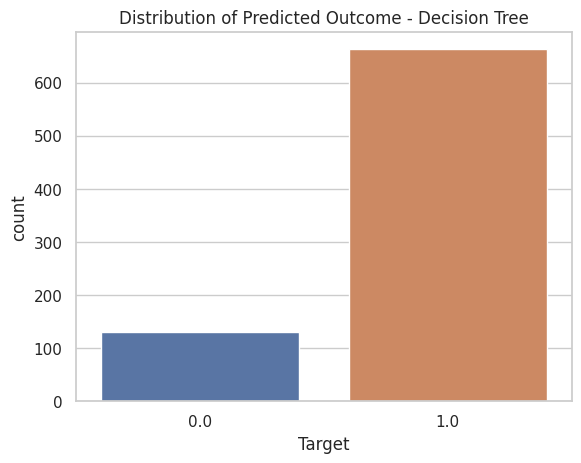

In [ ]:
sns.countplot(x = predition_df["Target"])
plt.title("Distribution of Predicted Outcome - Decision Tree")

**Logistic Regression Predictions**

In [ ]:
y_lr_prediction = logreg.predict(principalComponents_prediction)
predition_df['Target'] = y_lr_prediction
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     1.0  
1        0.244444  0.414795     1.0  
2        1.000000  0.311757     1.0  
3        0.755556  0.578600     1.0  
4        0.000000  0.124174     1.0  

[5 rows x 35 columns]

Text(0.5, 1.0, 'Distribution of Predicted Outcome - Logistic Regression')

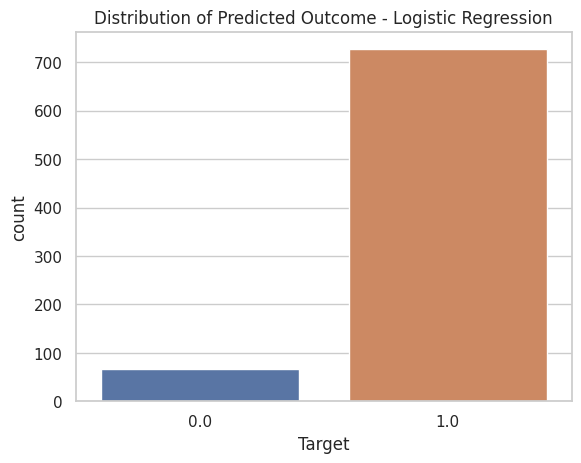

In [ ]:
sns.countplot(x = predition_df["Target"])
plt.title("Distribution of Predicted Outcome - Logistic Regression")

**LinearSVC Predictions**

In [ ]:
y_svc_prediction = svc.predict(principalComponents_prediction)
predition_df['Target'] = y_svc_prediction
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     1.0  
1        0.244444  0.414795     1.0  
2        1.000000  0.311757     1.0  
3        0.755556  0.578600     1.0  
4        0.000000  0.124174     1.0  

[5 rows x 35 columns]

Text(0.5, 1.0, 'Distribution of Predicted Outcome - Linear SVC')

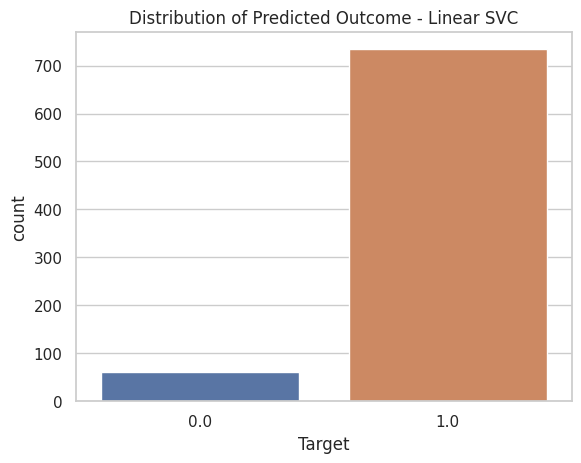

In [ ]:
sns.countplot(x = predition_df["Target"])
plt.title("Distribution of Predicted Outcome - Linear SVC")

**Gaussian Predictions**

In [ ]:
y_g_prediction = gaussian.predict(principalComponents_prediction)
predition_df['Target'] = y_g_prediction
predition_df.head()

Marital status  Application mode  Application order  Course  \
0             0.0               0.5              0.000  0.5625   
1             0.0               0.0              0.000  0.9375   
2             0.0               0.5              0.375  0.7500   
3             0.0               0.0              0.000  0.5625   
4             0.0               0.0              0.000  0.3125   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                         1.0                     0.0          0.0   
1                         1.0                     0.0          0.0   
2                         1.0                     0.0          0.0   
3                         1.0                     0.0          0.0   
4                         1.0                     0.0          0.0   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                0.444444                0.900000             0.161290  ...   
1                0.444444                0.433333             0.225806  ...   
2                0.000000                0.900000             0.129032  ...   
3                0.444444                0.900000             0.290323  ...   
4                0.444444                0.433333             0.096774  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                  0.0                             0.352941   
1                                  0.0                             0.411765   
2                                  0.0                             0.470588   
3                                  0.0                             0.352941   
4                                  0.0                             0.294118   

   Curricular units 2nd sem (evaluations)  \
0                                0.500000   
1                                0.285714   
2                                0.321429   
3                                0.428571   
4                                0.250000   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.166667                          0.625000   
1                             0.500000                          0.767045   
2                             0.666667                          0.649148   
3                             0.333333                          0.625000   
4                             0.333333                          0.738636   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                             0.0           0.372093   
1                                             0.0           1.000000   
2                                             0.0           0.593023   
3                                             0.0           0.000000   
4                                             0.0           0.209302   

   Inflation rate       GDP  Target  
0        0.488889  0.766182     1.0  
1        0.244444  0.414795     1.0  
2        1.000000  0.311757     1.0  
3        0.755556  0.578600     1.0  
4        0.000000  0.124174     1.0  

[5 rows x 35 columns]

Text(0.5, 1.0, 'Distribution of Predicted Outcome - Gaussian')

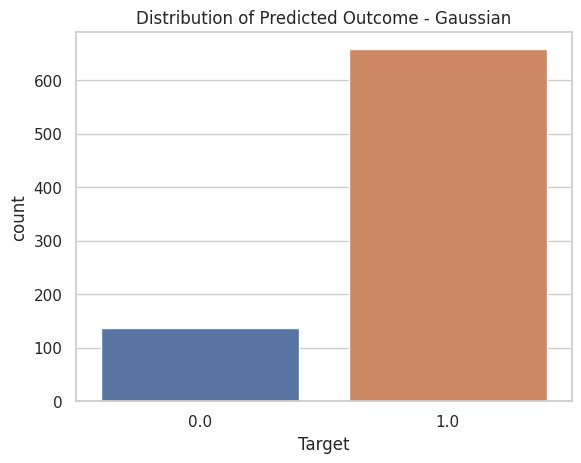

In [ ]:
sns.countplot(x = predition_df["Target"])
plt.title("Distribution of Predicted Outcome - Gaussian")

All the predictions shows similar patterns of most of the students graduating while around 100 students dropping out. It can be said that university should invest on their effort to redirect these students who have high chance of not completing their studies, so that these students also graduate in the future.